<a href="https://colab.research.google.com/github/drbarak/Project2_EDA/blob/main/Project2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read CSV

Source: https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from IPython.display import display
p = print
d = display

In [347]:
try:
  df = pd.read_csv('BankChurners.csv')
except:
  from google.colab import files
  uploaded = files.upload()
  df = pd.read_csv('BankChurners.csv')
  
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Drop last 2 columns

In [348]:
df.drop(df.columns[-2:], axis=1, inplace=True)
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [349]:
df.rename(columns={'CLIENTNUM': 'Client_num'}, inplace=True)

## change all columns to all lowercase

In [350]:
df.columns = df.columns.str.lower()

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_num                10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [352]:
df.client_num.nunique()

10127

## Make client_num index

In [353]:
df.set_index('client_num', inplace=True)

In [354]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
client_num,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [355]:
df.education_level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

# QUESTION: There are 1519 unknown education and 749 marital_status, 1112 income_category. What do we do with it

## Value_counts for all fields

In [356]:
for c in df.columns:
  p(df[[c]].value_counts())
  print()

attrition_flag   
Existing Customer    8500
Attrited Customer    1627
dtype: int64

customer_age
44              500
49              495
46              490
45              486
47              479
43              473
48              472
50              452
42              426
51              398
53              387
41              379
52              376
40              361
39              333
54              307
38              303
55              279
56              262
37              260
57              223
36              221
35              184
58              157
59              157
34              146
60              127
33              127
32              106
65              101
62               93
61               93
31               91
26               78
30               70
63               65
29               56
64               43
27               32
28               29
67                4
66                2
68                2
70                1
73                1
dty

# Avg_Utilization_Ratio 
It is the ratio of (credit card spent + money withdrawal)/(Total available limit for credit card spends + Total money withdrawal limit)

https://leaps.analyttica.com/sample_cases/11

total_Relationship_Count	Num	Total no. of products held by the customer

Total_Revolving_Bal	Num	Total Revolving Balance on the Credit Card

Looking at the distribution plot of the Months on book there is a weird concentration in 36 months, does any one know a reason for this?

# Is there a relation between 0 for total_revolving_balance and attrition or months_on_book

Is there a relation between non usage of the card to attrition

## Change column Attrition_Flag to 'churn' with 1 for yes and 0 for no (stayed with the card company)

In [357]:
df.rename(columns={'attrition_flag': 'churn'}, inplace=True)
df.columns

Index(['churn', 'customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

In [358]:
df.churn = df['churn'].apply(lambda x: 0 if x == 'Existing Customer' else 1)
df.churn.value_counts()

0    8500
1    1627
Name: churn, dtype: int64

## Change column Gender to 'female' with 1 for yes and 0 for no

In [359]:
df.rename(columns={'gender': 'female'}, inplace=True)
df.female = df['female'].apply(lambda x: 1 if x == 'F' else 0)
df.female.value_counts()

1    5358
0    4769
Name: female, dtype: int64

## Change column customer_age to 'age' 

In [360]:
df.rename(columns={'customer_age': 'age'}, inplace=True)
df.columns

Index(['churn', 'age', 'female', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'card_category', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon',
       'contacts_count_12_mon', 'credit_limit', 'total_revolving_bal',
       'avg_open_to_buy', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_trans_ct', 'total_ct_chng_q4_q1', 'avg_utilization_ratio'],
      dtype='object')

## Change column education_level to 'education' and numeric as per table below

In [361]:
eds = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate','Doctorate']
df.rename(columns={'education_level': 'education'}, inplace=True)
df.education = df['education'].apply(lambda x: eds.index(x))
df.education.value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: education, dtype: int64


```
education_level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
```




## Change column marital_status to numeric as per table below



```
marital_status
Married           4687
Single            3943
Unknown            749
Divorced           748

marital_status
Married           2
Single            1
Unknown            0
Divorced           3
```



In [362]:
maritals = ['Unknown', 'Single', 'Married', 'Divorced']
df.marital_status = df['marital_status'].apply(lambda x: maritals.index(x))
df.marital_status.value_counts()

2    4687
1    3943
0     749
3     748
Name: marital_status, dtype: int64

## Change column income_category to numeric as per table below



```
income_category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
Unknown            1112
$120K +             727
```



In [363]:
incs = ['Unknown','Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +']
df.income_category = df['income_category'].apply(lambda x: incs.index(x))
df.income_category.value_counts()

1    3561
2    1790
3    1535
4    1402
0    1112
5     727
Name: income_category, dtype: int64

## Change card_category to 'card' with numeric as per table below



```
card_category
Blue             9436
Silver            555
Gold              116
Platinum           20
```



In [364]:
cards = ['', 'Blue', 'Silver', 'Gold', 'Platinum']
df.rename(columns={'card_category': 'card'}, inplace=True)
df.card = df['card'].apply(lambda x: cards.index(x))

  # can use map
#d = {'Blue' : 1, 'Silver' : 2, 'Gold': 3, 'Platinum': 4}
#df.card = df['card'].map(d)

  # or replace
#df = df.replace({'card': d})

df.card.value_counts()

1    9436
2     555
3     116
4      20
Name: card, dtype: int64

## Verify all fields are numeric

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   churn                     10127 non-null  int64   
 1   age                       10127 non-null  int64   
 2   female                    10127 non-null  int64   
 3   dependent_count           10127 non-null  int64   
 4   education                 10127 non-null  int64   
 5   marital_status            10127 non-null  int64   
 6   income_category           10127 non-null  int64   
 7   card                      10127 non-null  int64   
 8   months_on_book            10127 non-null  int64   
 9   total_relationship_count  10127 non-null  int64   
 10  months_inactive_12_mon    10127 non-null  int64   
 11  contacts_count_12_mon     10127 non-null  int64   
 12  credit_limit              10127 non-null  float64 
 13  total_revolving_bal       10127 no

# Plot pair relations of all columns

When we plot all the pairs, each plot is too small - need to limit it to few pairs

In [408]:
#sns.pairplot(data=df, kind='kde', vars=['churn','age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


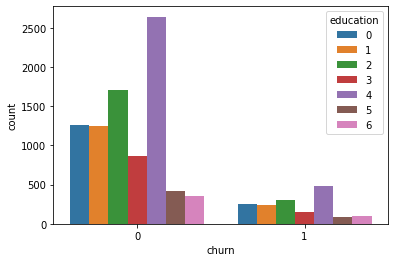

In [367]:
sns.countplot('churn',hue='education',data=df)

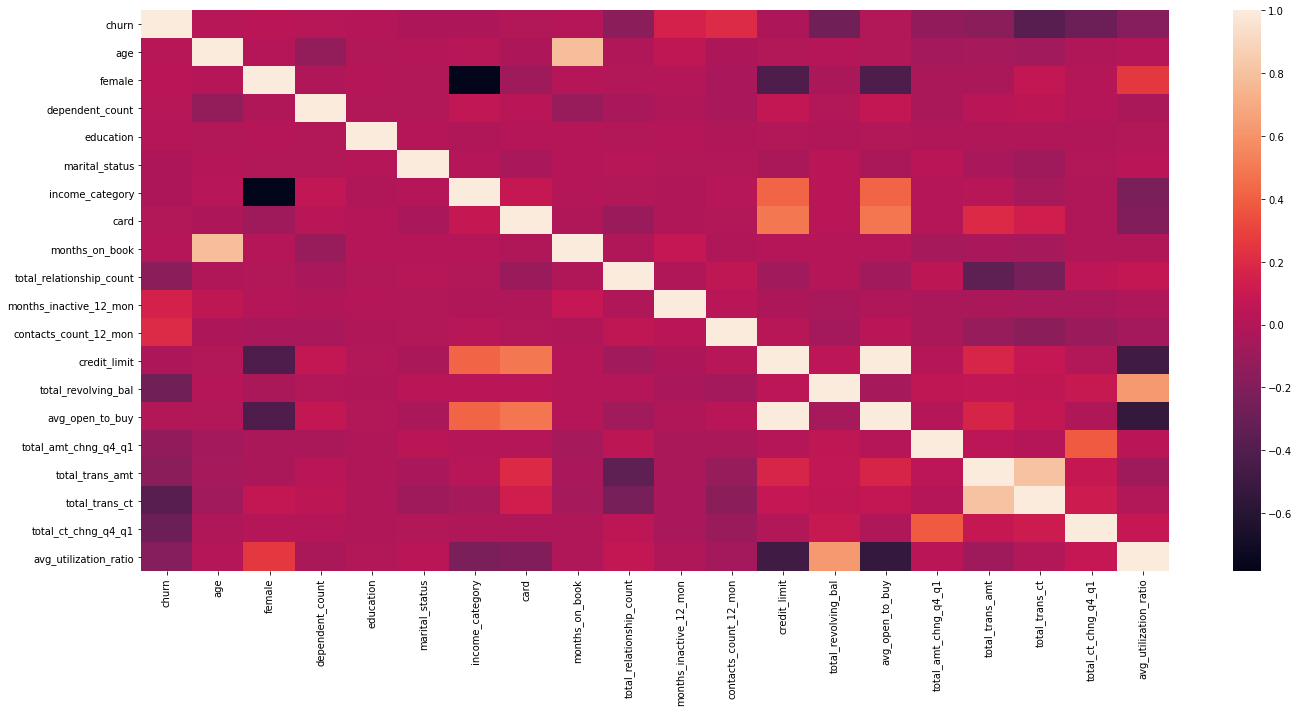

In [368]:
fig = plt.figure(figsize=(20, 10), tight_layout=True)
sns.heatmap(df.corr())

# DEFINITION of the function display_corr()

In [369]:
n_colors = 256 # Use 256 colors for the diverging color palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette

def value_to_color(val):
    # step 4 - add colors

    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size, color):
    # Step 1
    n = np.sqrt(len(x))
    fig = plt.figure(figsize=(max(4, n), max(4, n / 2)))
    #ax = fig.gca()

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]

    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

    # Step 2
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    # Step 3
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

    # Step 5
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 

In [370]:
def clear_corr(df, clear, display_table=True):
  clear_opt = 0
  clear_opts = ['diagonal', 'upperleft', 'lowerleft', 'upperleftdiagonal', 'lowerleftdiagonal',
                'upperright', 'lowerright', 'upperrightdiagonal', 'lowerrightdiagonal',
                'diagonalleft','diagonalright']
  if clear and clear.lower() in clear_opts:
    clear_opt = clear_opts.index(clear.lower()) + 1

  #corr = df[df.columns].corr()  # n columns makes n * n correlations values
  corr = df.corr()
  if clear_opt:
    corr = corr[sorted(df.columns, reverse=True)]
    corr = corr.loc[sorted(df.columns, reverse=False)]
    n = len(corr.columns)
    diag = 0 if clear_opt in [1,4,3,8,9,10,11] else 1
    for i in range(n):
      if clear_opt in [1, 10]:    # diagonal, diagonalleft
        corr.iloc[i, i + diag] = 0
      elif clear_opt in [6,8]:  # upperright, upperrightdiagonal 
        corr.iloc[i, i + diag:n] = 0
      elif clear_opt in [3,5]:  # lowerleft, lowerleftdiagonal
        corr.iloc[i, 0:i + diag] = 0
      elif clear_opt in [2,4]:  # upperleft, upperleftdiagonal
        corr.iloc[i, 0: n - i - diag] = 0
      elif clear_opt in [11]:  # diagonalright
        corr.iloc[i, n - i - 1] = 0
      elif clear_opt in [7,9]:  # lowerright, lowerrightdiagonal
        corr.iloc[i, n - i + diag - 1: n] = 0
  if display_table:
    display(corr.head())
  return corr

In [371]:
def display_corr(df, clear=None):
  corr = clear_corr(df, clear)
  corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
  corr.columns = ['x', 'y', 'value']
  heatmap(x=corr['x'], y=corr['y'], size=corr['value'].abs(), color=corr.value)  

# Look at the columns with unknown

In [372]:
df_partial = df[['churn', 'marital_status', 'income_category', 'education']]
df_partial.head()

,churn,marital_status,income_category,education
client_num,,,,
768805383,0,2,4,2
818770008,0,1,1,4
713982108,0,2,3,4
769911858,0,0,1,2
709106358,0,2,4,1


## correlation with unknown in the db

,churn,marital_status,income_category,education
churn,1.000000,-0.018597,-0.019514,0.008796
marital_status,-0.018597,1.000000,0.010402,0.014875
income_category,-0.019514,0.010402,1.000000,-0.013326
education,0.008796,0.014875,-0.013326,1.000000


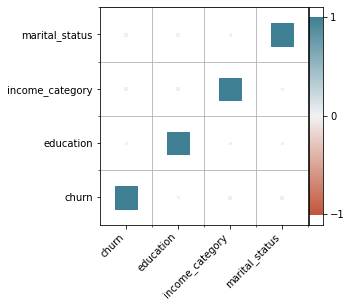

In [373]:
display_corr(df_partial)

## Drop the rows with unknown and check correlation again

No change: maybe beuse their value was 0

(10127, 4)
(7081, 4)


,churn,marital_status,income_category,education
churn,1.000000,-0.018597,-0.019514,0.008796
marital_status,-0.018597,1.000000,0.010402,0.014875
income_category,-0.019514,0.010402,1.000000,-0.013326
education,0.008796,0.014875,-0.013326,1.000000


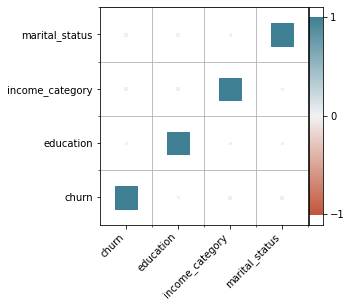

In [374]:
df_temp = df_partial.copy()
p(df_temp.shape)
#p(df_temp.education.value_counts())
df_temp = df_temp[df_temp.education > 0]
df_temp = df_temp[df_temp.marital_status > 0]
df_temp = df_temp[df_temp.income_category > 0]
p(df_temp.shape)
display_corr(df_partial)

# Profiling - not working in colab - works in Jupyter

In [375]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(df)

In [376]:
df[df.months_on_book == 36].count()

churn                       2463
age                         2463
female                      2463
dependent_count             2463
education                   2463
marital_status              2463
income_category             2463
card                        2463
months_on_book              2463
total_relationship_count    2463
months_inactive_12_mon      2463
contacts_count_12_mon       2463
credit_limit                2463
total_revolving_bal         2463
avg_open_to_buy             2463
total_amt_chng_q4_q1        2463
total_trans_amt             2463
total_trans_ct              2463
total_ct_chng_q4_q1         2463
avg_utilization_ratio       2463
dtype: int64

## To display the profile report we need first to upload it

In [377]:
'''
import IPython
try:
  display(IPython.display.HTML('credit_card_profile.html'))
except:
  from google.colab import files
  uploaded = files.upload()
  display(IPython.display.HTML('credit_card_profile.html'))
'''  

"\nimport IPython\ntry:\n  display(IPython.display.HTML('credit_card_profile.html'))\nexcept:\n  from google.colab import files\n  uploaded = files.upload()\n  display(IPython.display.HTML('credit_card_profile.html'))\n"

## From the profile report we see some outliers:

1. a lot of clients at the age around 50
2. pick of people with 36 months_on_book - maybe that when the carsd expires. We need to check if most that left are at 36 months
3. Most people did not use the cards - total_revolving = 0. Check if they left the card
4. Pick at 2500$ for total_revolving


# Let's look at the correlation of exist with the other columns and pick thouse with meanningfull correlation (above 0.2 maybe?)

In [378]:
corr = df.corr()  # n columns makes n * n correlations values
p(type(corr))
p()
p(corr.churn)
p()
corr.churn[abs(corr.churn) > 0.2]

<class 'pandas.core.frame.DataFrame'>

churn                       1.000000
age                         0.018203
female                      0.037272
dependent_count             0.018991
education                   0.008796
marital_status             -0.018597
income_category            -0.019514
card                        0.002354
months_on_book              0.013687
total_relationship_count   -0.150005
months_inactive_12_mon      0.152449
contacts_count_12_mon       0.204491
credit_limit               -0.023873
total_revolving_bal        -0.263053
avg_open_to_buy            -0.000285
total_amt_chng_q4_q1       -0.131063
total_trans_amt            -0.168598
total_trans_ct             -0.371403
total_ct_chng_q4_q1        -0.290054
avg_utilization_ratio      -0.178410
Name: churn, dtype: float64



churn                    1.000000
contacts_count_12_mon    0.204491
total_revolving_bal     -0.263053
total_trans_ct          -0.371403
total_ct_chng_q4_q1     -0.290054
Name: churn, dtype: float64

## check contacts_count_12_mon

### CONCLUSION 1: Anybody that contacted 6 times in the last 12 months -> left

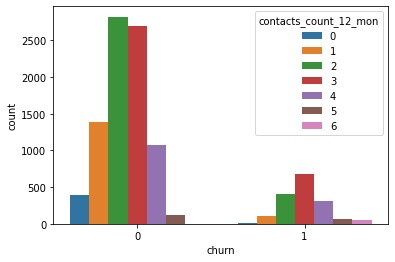

In [379]:
sns.countplot(x='churn',hue='contacts_count_12_mon',data=df)

In [380]:
df.contacts_count_12_mon.loc[df.churn == 0].value_counts()

2    2824
3    2699
1    1391
4    1077
0     392
5     117
Name: contacts_count_12_mon, dtype: int64

## check total_revolving_baland 

### make bins from total_revolving_baland then plot the countplot

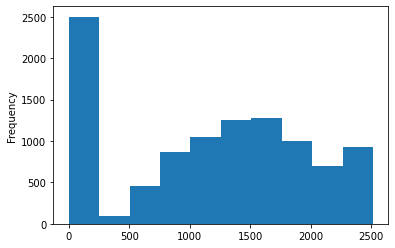

In [381]:
# make bins from the columns, each one 250$ 
# we see the needed bins from the historam
df['total_revolving_bal'].plot(kind='hist')

In [382]:
def makebins(col, interval):
  max_ = col.max()
  nbins = int(max_/interval) + 1 
  max250 = (nbins)*interval
  bins = np.linspace(0, max250, nbins + 1)
  #p(bins)
  return bins
bins = makebins(df['total_revolving_bal'], 250)
df['binned'] = pd.cut(df['total_revolving_bal'], bins, include_lowest=True)
p(df['binned'])
df.total_revolving_bal.head()

client_num
768805383     (750.0, 1000.0]
818770008     (750.0, 1000.0]
713982108     (-0.001, 250.0]
769911858    (2500.0, 2750.0]
709106358     (-0.001, 250.0]
                   ...       
772366833    (1750.0, 2000.0]
710638233    (2000.0, 2250.0]
716506083     (-0.001, 250.0]
717406983     (-0.001, 250.0]
714337233    (1750.0, 2000.0]
Name: binned, Length: 10127, dtype: category
Categories (11, interval[float64]): [(-0.001, 250.0] < (250.0, 500.0] < (500.0, 750.0] <
                                     (750.0, 1000.0] ... (1750.0, 2000.0] < (2000.0, 2250.0] <
                                     (2250.0, 2500.0] < (2500.0, 2750.0]]


client_num
768805383     777
818770008     864
713982108       0
769911858    2517
709106358       0
Name: total_revolving_bal, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


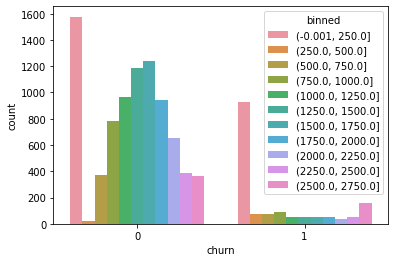

In [383]:
sns.countplot('churn',hue='binned',data=df)

### CONCLUSION 2: looks like low usage and usagehigher chances to leave

## check total_trans_ct

### make bins from total_trans_ct then plot the countplot

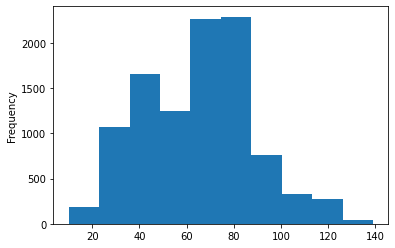

In [384]:
df['total_trans_ct'].plot(kind='hist')

In [385]:
bins = makebins(df['total_trans_ct'], 10)
df['binned'] = pd.cut(df['total_trans_ct'], bins, include_lowest=True)
p(df['binned'])
df.total_trans_ct.head()

client_num
768805383      (40.0, 50.0]
818770008      (30.0, 40.0]
713982108      (10.0, 20.0]
769911858      (10.0, 20.0]
709106358      (20.0, 30.0]
                  ...      
772366833    (110.0, 120.0]
710638233      (60.0, 70.0]
716506083      (50.0, 60.0]
717406983      (60.0, 70.0]
714337233      (60.0, 70.0]
Name: binned, Length: 10127, dtype: category
Categories (14, interval[float64]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < ... <
                                     (100.0, 110.0] < (110.0, 120.0] < (120.0, 130.0] <
                                     (130.0, 140.0]]


client_num
768805383    42
818770008    33
713982108    20
769911858    20
709106358    28
Name: total_trans_ct, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


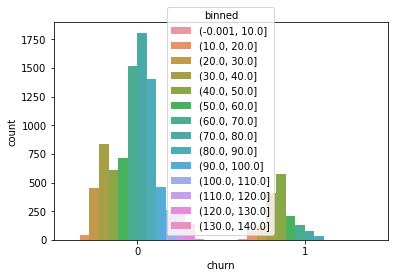

In [386]:
sns.countplot('churn',hue='binned',data=df)

In [387]:
df.binned.loc[df.churn == 0].value_counts()

(70.0, 80.0]      1809
(60.0, 70.0]      1516
(80.0, 90.0]      1405
(30.0, 40.0]       833
(50.0, 60.0]       715
(40.0, 50.0]       614
(90.0, 100.0]      465
(20.0, 30.0]       456
(100.0, 110.0]     262
(110.0, 120.0]     239
(120.0, 130.0]     138
(10.0, 20.0]        38
(130.0, 140.0]      10
(-0.001, 10.0]       0
Name: binned, dtype: int64

### CONCLUSION 3: Anybody with total_trans_ct > 100 DID NOT leave

## check total_ct_chng_q4_q1 whose correlation with churn is 0.290054
This column "represents how much the customer increased their number of transactions when comparing the 4th quarter agains the 1st."


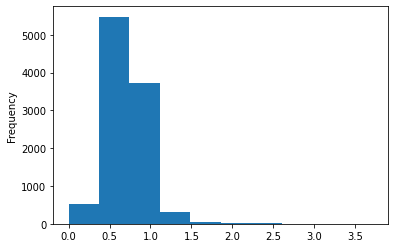

In [388]:
df['total_ct_chng_q4_q1'].plot(kind='hist')        

In [389]:
bins = makebins(df['total_ct_chng_q4_q1'], 0.4)
df['binned'] = pd.cut(df['total_ct_chng_q4_q1'], bins, include_lowest=True)
p(df['binned'])
df.total_ct_chng_q4_q1.head()

client_num
768805383    (1.6, 2.0]
818770008    (3.6, 4.0]
713982108    (2.0, 2.4]
769911858    (2.0, 2.4]
709106358    (2.4, 2.8]
                ...    
772366833    (0.8, 1.2]
710638233    (0.4, 0.8]
716506083    (0.8, 1.2]
717406983    (0.4, 0.8]
714337233    (0.4, 0.8]
Name: binned, Length: 10127, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.4] < (0.4, 0.8] < (0.8, 1.2] < (1.2, 1.6] < ... <
                                     (2.4, 2.8] < (2.8, 3.2] < (3.2, 3.6] < (3.6, 4.0]]


client_num
768805383    1.625
818770008    3.714
713982108    2.333
769911858    2.333
709106358    2.500
Name: total_ct_chng_q4_q1, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


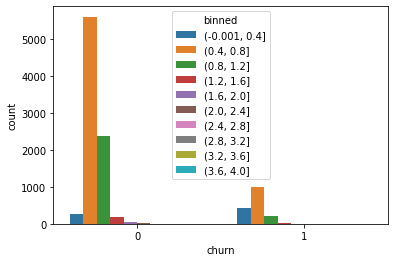

In [390]:
sns.countplot('churn',hue='binned',data=df)

In [391]:
df.binned.loc[df.churn == 0].value_counts()

(0.4, 0.8]       5605
(0.8, 1.2]       2375
(-0.001, 0.4]     277
(1.2, 1.6]        178
(1.6, 2.0]         41
(2.0, 2.4]         12
(2.4, 2.8]          5
(3.2, 3.6]          3
(2.8, 3.2]          3
(3.6, 4.0]          1
Name: binned, dtype: int64

### CONCLUSION 4: Anybody with total_ct_chng_q4_q1 > 1.6 DID NOT leave

In [392]:
df.describe()

,churn,age,female,dependent_count,education,marital_status,income_category,card,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.529081,2.346203,2.601955,1.536585,2.072578,1.083638,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.700417,0.737808,1.461929,0.333784,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Age distribution

client_num
768805383    (44.0, 46.0]
818770008    (48.0, 50.0]
713982108    (50.0, 52.0]
769911858    (38.0, 40.0]
709106358    (38.0, 40.0]
                 ...     
772366833    (48.0, 50.0]
710638233    (40.0, 42.0]
716506083    (42.0, 44.0]
717406983    (28.0, 30.0]
714337233    (42.0, 44.0]
Name: binned, Length: 10127, dtype: category
Categories (37, interval[float64]): [(-0.001, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < ... <
                                     (66.0, 68.0] < (68.0, 70.0] < (70.0, 72.0] < (72.0, 74.0]]
<class 'pandas.core.series.Series'>


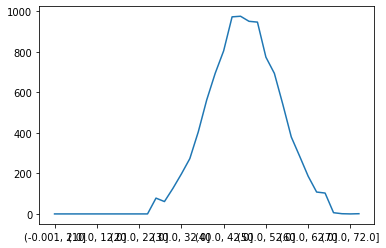

In [393]:
bins = makebins(df['age'], 2)
df['binned'] = pd.cut(df['age'], bins, include_lowest=True)
p(df['binned'])
#p(df.binned.value_counts())
s = df.binned.value_counts(sort=False)
p(type(s))
s[s > 0]
s.plot()

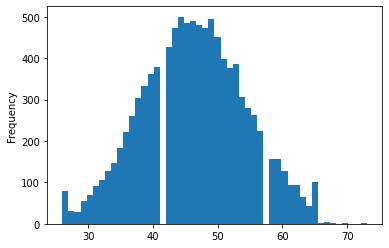

In [394]:
df.age.plot.hist(bins=50)

# Gender effect

,churn,contacts_count_12_mon,total_revolving_bal,total_trans_ct,total_ct_chng_q4_q1
churn,1.000000,0.204491,-0.263053,-0.371403,-0.290054
contacts_count_12_mon,0.204491,1.000000,-0.053913,-0.152213,-0.094997
total_revolving_bal,-0.263053,-0.053913,1.000000,0.056060,0.089861
total_trans_ct,-0.371403,-0.152213,0.056060,1.000000,0.112324
total_ct_chng_q4_q1,-0.290054,-0.094997,0.089861,0.112324,1.000000


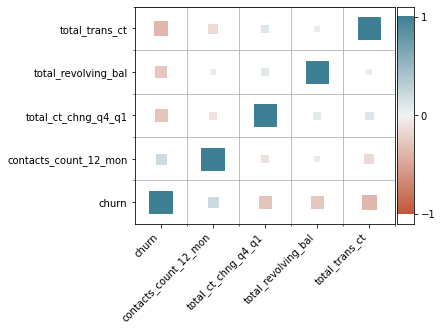

In [395]:
df_corr_0_2 = df[['churn', 'contacts_count_12_mon', 'total_revolving_bal', 'total_trans_ct', 'total_ct_chng_q4_q1']]
display_corr(df_corr_0_2)

,churn,contacts_count_12_mon,total_revolving_bal,total_trans_ct,total_ct_chng_q4_q1
churn,1.000000,0.365093,0.024639,0.077461,0.128598
contacts_count_12_mon,0.365093,1.000000,0.551140,0.712082,0.734371
total_revolving_bal,0.024639,0.551140,1.000000,0.649750,0.662105
total_trans_ct,0.077461,0.712082,0.649750,1.000000,0.851508
total_ct_chng_q4_q1,0.128598,0.734371,0.662105,0.851508,1.000000


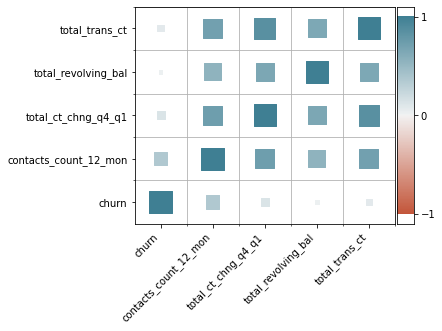

In [396]:
result = df_corr_0_2.mul(df.female, axis=0)
display_corr(result)


# What are average values of numerical features for card holders that left?

In [397]:
df[df.churn == 0].mean()

churn                          0.000000
age                           46.262118
female                         0.520941
dependent_count                2.335412
education                      2.595412
marital_status                 1.542588
income_category                2.085059
card                           1.083294
months_on_book                35.880588
total_relationship_count       3.914588
months_inactive_12_mon         2.273765
contacts_count_12_mon          2.356353
credit_limit                8726.877518
total_revolving_bal         1256.604118
avg_open_to_buy             7470.273400
total_amt_chng_q4_q1           0.772510
total_trans_amt             4654.655882
total_trans_ct                68.672588
total_ct_chng_q4_q1            0.742434
avg_utilization_ratio          0.296412
dtype: float64

# Grouping by Card holders that left

In [398]:
columns_to_show = ['contacts_count_12_mon', 'total_revolving_bal', 'total_trans_ct', 'total_ct_chng_q4_q1']
df.groupby(['churn'])[columns_to_show].describe()

contacts_count_12_mon                      ... total_ct_chng_q4_q1              
                      count      mean       std  ...                 50%    75%    max
churn                                            ...                                  
0                    8500.0  2.356353  1.081436  ...               0.721  0.833  3.714
1                    1627.0  2.972342  1.090537  ...               0.531  0.692  2.500

[2 rows x 32 columns]

In [399]:
df.groupby(['churn', 'female'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

contacts_count_12_mon                 ... total_ct_chng_q4_q1              
                              mean       std amin  ...                 std   amin   amax
churn female                                       ...                                  
0     0                   2.413310  1.098379    0  ...            0.246301  0.143  3.571
      1                   2.303975  1.063051    0  ...            0.209557  0.028  3.714
1     0                   3.021521  1.076577    0  ...            0.252603  0.000  2.500
      1                   2.935484  1.100019    0  ...            0.203639  0.000  1.684

[4 rows x 16 columns]

# Effects of some columns on churn card holders (those that left)

source: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

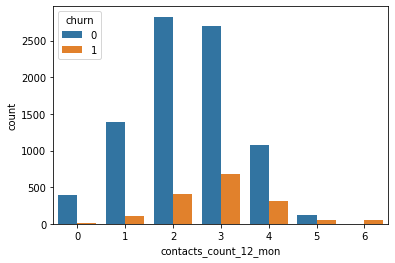

In [400]:
pd.crosstab(df.churn, df.contacts_count_12_mon, margins=True)
sns.countplot(x='contacts_count_12_mon', hue='churn', data=df)

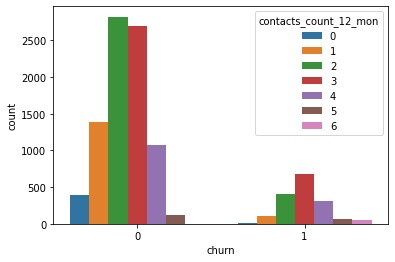

In [401]:
sns.countplot(x='churn',hue='contacts_count_12_mon',data=df)

In [402]:
df['Many_service_calls'] = (df.contacts_count_12_mon > 4).astype('int')

pd.crosstab(df['Many_service_calls'], df.churn, margins=True)

churn,0,1,All
Many_service_calls,,,
0,8383,1514,9897
1,117,113,230
All,8500,1627,10127


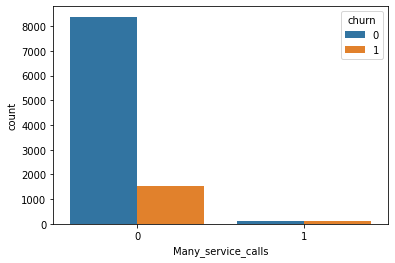

In [403]:
sns.countplot(x='Many_service_calls', hue='churn', data=df)

In [404]:
100* (1 - (1541  + 117 )/(8383 + 113))

80.484934086629

In [405]:
p(df.card.value_counts())
pd.crosstab(df['Many_service_calls'] & df.female , df.churn)

1    9436
2     555
3     116
4      20
Name: card, dtype: int64


churn,0,1
row_0,,
0,8466,1565
1,34,62


In [406]:
100* (1 - (1520  + 110 )/(8390 + 107))

80.81675885606685

סוג כרטיס לפי הכנסה, גיל
סוג כרטיס לנשים, כמות בזבוז
מסגרת אשראי, שימוש גבוה במה זה תלוי